In [1]:
!pip install opencc

import numpy as np
import pandas as pd
from opencc import OpenCC
import random

In [2]:
file_path ="C://Users//User//Desktop//Hotel2000.xlsx"
df = pd.read_excel(file_path, header=None)
cc = OpenCC('t2s')
# 定義轉換函數
def convert_to_simplified(text):
    return cc.convert(text)
# 將 0 列中的所有繁體字轉換成簡體字
df[0] = df[0].apply(convert_to_simplified)

In [3]:
df

,0,1,2,3,4,5
0,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较...",距离 川沙 公路 较近 但是 公交 指示 不对 如果 是 蔡陆线 的 话 会 非常 麻烦 ...,不对 麻烦 较为简单,不对 麻烦,较为简单,1
1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!,商务 大床房 房间 很大 床 有 2M 宽 整体 感觉 经济 实惠 不错,大 经济 实惠 不错,NaN,大 经济 实惠 不错,1
2,"位置离我们单位很近,从价格来说,性价比很高.我要的大床房,168元,前台服务员态度很好,房间...",位置 离 我们 单位 很近 从 价格 来说 性价比 很高 我 要的 大床房 168 元 前...,高 一般 干净 太硬 骚扰 好 免费 不错,一般 太硬 骚扰,高 好 干净 免费 不错,1
3,"房间还算干净整洁,服务也可以,以这个价格来说,不错了,建议大家要定有窗户的房间,但是餐厅不够...",房间 还算 干净 整洁 服务 也 可以 以 这个 价格 来说 不错 了 建议 大家 要 定有...,干净 整洁 可以 不错 好 酸 不太方便 很远,酸 不太方便 很远,干净 整洁 可以 不错 好,1
4,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较...",距离 川沙 公路 较近 但是 公交 指示 不对 如果 是 蔡陆线 的话 会 非常 麻烦 ...,较近 不对 麻烦 建议 简单,不对 麻烦,较近 不对 简单,1
...,...,...,...,...,...,...
1995,尼斯酒店的几大特点：噪音大、环境差、配置低、服务效率低。如：1、隔壁歌厅的声音闹至午夜3点许...,尼斯 酒店 的 几大 特点 噪音 大 环境 差 配置 低 服务 效率 低 如 隔壁 歌厅 ...,大 差 低 闹 破旧 少 实惠,差 低 闹 破旧 少,大 实惠,0
1996,价格和房间严重不成比例的宾馆,价格 和 房间 严重 不成 比例 的 宾馆,严重,严重,NaN,0
1997,看照片觉得还挺不错的，又是4星级的，但入住以后除了后悔没有别的，房间挺大但空空的，早餐是有但...,看 照片 觉得 还 挺不错 的 又是 4星级 的 但 入住 以后 除了 后悔 没有 别的 房...,不错 大 好 后悔,后悔,不错 大 好,0
1998,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...,我们 去 盐城 的 时候 那里 的 最低 气温 只有 4 度 晚上 冷得 要死 居然 还 不...,可怜,可怜,NaN,0


In [4]:
import jieba
import pandas as pd

# Assuming df is your DataFrame
custom_tokenized_data = []

for text in df[1]:
    # Convert non-string objects to strings
    if not isinstance(text, str):
        text = str(text)

    tokens = jieba.cut(text)
    custom_tokenized_data.append(" ".join(tokens))

# Store tokenized text in a new column
df['tokenized'] = custom_tokenized_data


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.558 seconds.
Prefix dict has been built successfully.


In [5]:
# 读取停用词文件，将停用词存储在一个集合中
stopwords_path = 'C://Users//User//Desktop//baidu_stopwords.txt'
with open(stopwords_path, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

# 对 df['tokenized'] 列中的文本进行迭代，并删除其中的停用词
cleaned_text = []
for text in df['tokenized']:
    tokens = text.split()
    cleaned_tokens = [token for token in tokens if token not in stopwords]
    cleaned_text.append(" ".join(cleaned_tokens))

# 将删除停用词后的文本存储在一个新的列中
df['cleaned'] = cleaned_text

In [6]:
user_dict_path = 'C://Users//User//Desktop//output.txt'
jieba.load_userdict(user_dict_path)

# 使用自定义词典对 df['cleaned'] 列中的文本进行分词
custom_tokenized_data = []
for text in df['cleaned']:
    tokens = jieba.cut(text)
    custom_tokenized_data.append(" ".join(tokens))

# 将使用自定义词典分词后的文本存储在一个新的列中
df['custom_tokenized'] = custom_tokenized_data

In [7]:
import unicodedata
cleaned_tokens_without_punctuation_and_digits = []

for text in df['custom_tokenized']:
    # 使用unicodedata库去除所有标点符号和数字
    cleaned_text = ''.join([char for char in text if not unicodedata.category(char).startswith('P') and not char.isdigit()])
    cleaned_tokens_without_punctuation_and_digits.append(cleaned_text)

# 将去除标点符号和数字后的文本存储在一个新的列中
df['final_cleaned'] = cleaned_tokens_without_punctuation_and_digits
df['final_cleaned']

0       距离   川沙   公路   较近   公交   指示   不   蔡陆线   话   会 ...
1       商务   大床   房   房间   很大   床   M   宽   整体   感觉   ...
2       位置   单位   很近   价格   来说   性价比   很   高   大床   房 ...
3       房间   还   算   干净   整洁   服务   价格   来说   不错   建议 ...
4       距离   川沙   公路   较近   公交   指示   不   蔡陆线   会   麻烦...
                              ...                        
1995    尼斯   酒店   大   噪音   大   环境   差   配置   低   服务   ...
1996                                    价格   房间   比例   宾馆
1997    看   照片   还   挺不错      星级   入住   后悔   房间   挺大  ...
1998    去   盐城   最低   气温      度   晚上   冷得   要死   居然   ...
1999    说   实在   很   失望   看   其他人   点评   后   还   才   去...
Name: final_cleaned, Length: 2000, dtype: object

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
# Convert all elements in the column to strings
df['final_cleaned'] = df['final_cleaned'].apply(lambda x: str(x))

vectorizer = TfidfVectorizer()

# Convert the text data into numerical features
X = vectorizer.fit_transform(df['final_cleaned'])

# Use df[5] as the target
y = df[5]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Predict
y_pred = svm_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       298
           1       0.92      0.83      0.87       302

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.87       600
weighted avg       0.88      0.88      0.87       600



In [9]:
from EnLIMEText import process_sentence
from EnLIMEText import clean_text

# 使用你的句子调用函数
sentence = '距离川沙公路较近,但是公交指示不对,如果是"蔡陆线"的话,会非常麻烦.建议用别的路线.'

# 预处理句子，去除标点符号、特殊字符和数字
cleaned_sentence = clean_text(sentence)

# 调用 process_sentence 函数并传入处理后的句子
result = process_sentence(cleaned_sentence, vectorizer, svm_classifier, X_train, y_train)
print(result)


OrderedDict([('LIME', [('距离', -0.0018803005206170374), ('川沙', -0.030097445154429282), ('公路', -0.0243264845262537), ('较近', -0.028087300953516987), ('但是', 0.0001598002212537925), ('公交', -0.018921874589355844), ('指示', -0.026419330940375338), ('不对', 0.0017537980250994822), ('如果', 0.0014432867911850162), ('是', 0.0029805719103424013), ('蔡陆线', -0.030025646772998245), ('的话', 0.0006906378073202526), ('会', 0.0023534843307620795), ('非常', -0.0007518963565024328), ('麻烦', -0.017087329042441295), ('建议', 0.01023283168174337), ('用', -0.0006407034790630134), ('别的', 0.0017861414155757123), ('路线', -0.015760119247820458)]), ('EnLIME-Random Forest', [('距离', 0.010031502527476643), ('川沙', 0.13667077413093873), ('公路', 0.13582233402732066), ('较近', 0.16539232546980767), ('但是', 0.008313466807343439), ('公交', 0.055514313721223355), ('指示', 0.1572667722082548), ('不对', 0.010609155345013794), ('如果', 0.006710696856412186), ('是', 0.010267496254706203), ('蔡陆线', 0.15208296990201942), ('的话', 0.009845301900684014), ('会', 0.0

In [10]:
from EnLIMEText import plot_word_importances_Map


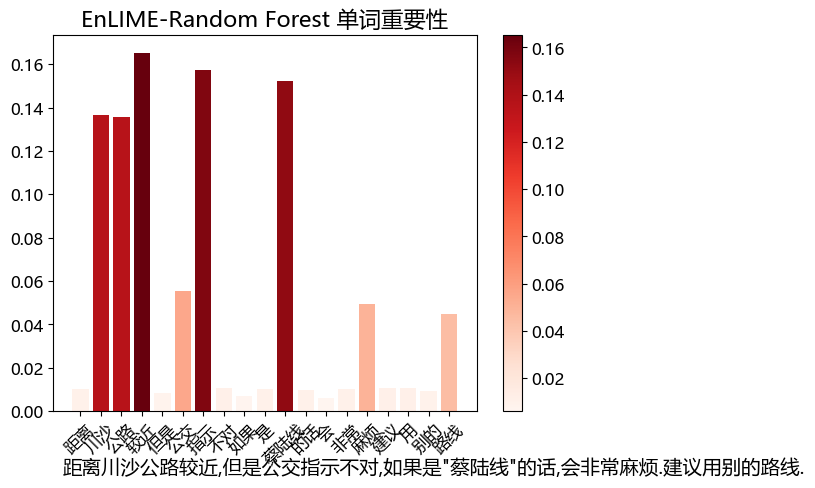

In [11]:
plot_word_importances_Map(result,sentence,"EnLIME-Random Forest")